![alt text][logo]

[logo]:download2.jfif
# SPACESHIP TITANIC 
##### This dataset was obtained from a kaggle competion, [**spaceship titanic**](https://www.kaggle.com/c/spaceship-titanic).
---

The dataset contains information about passengers onboard a titatic spaceship that collided with a spacetime anomaly hidden within a dust cloud.
Upon collison half of the passengers were transported to an alternate dimension.

The objective of the challenge is to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged
computer system. This will help the rescue crews and retrieve the lost passengers

**This project will follow the following steps:**

**Step 1:** Importing Modules

**Step 2:** Loading Data

**Step 3:** Understanding the Data

**Step 4:** Data Cleaning and Wrangling

**Step 5:** Exploratory Data Analysis and Feature Engineering

**Step 6:** Model Development

**Step 7:** Model Evaluation and Refinement


## STEP 1: Importing required modules for data analysis
---

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## STEP 2: Loading the data
---

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## STEP 3: Understanding the imported data
---
**PassengerId -->** A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
People in a group are often family members, but not always.
                
**HomePlanet -->** The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep -->** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin -->** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination -->** The planet the passenger will be debarking to.

**Age -->** The age of the passenger.

**VIP -->** Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck -->** Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name -->** The first and last names of the passenger.

**Transported -->** Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## STEP 4: Data Cleaning/Wrangling
---
The following steps will be folowed during data cleaning
1. Handling missing values
2. Data formating and Standardization
3. Data Normalization
4. Binning

### STEP 4.1: Handling Missing Values
---

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
missing_data = train_data.isnull()
missing_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for col in missing_data.columns.values.tolist():
    print(missing_data[[col]].value_counts())
    print('-------------------------------')

PassengerId
False          8693
dtype: int64
-------------------------------
HomePlanet
False         8492
True           201
dtype: int64
-------------------------------
CryoSleep
False        8476
True          217
dtype: int64
-------------------------------
Cabin
False    8494
True      199
dtype: int64
-------------------------------
Destination
False          8511
True            182
dtype: int64
-------------------------------
Age  
False    8514
True      179
dtype: int64
-------------------------------
VIP  
False    8490
True      203
dtype: int64
-------------------------------
RoomService
False          8512
True            181
dtype: int64
-------------------------------
FoodCourt
False        8510
True          183
dtype: int64
-------------------------------
ShoppingMall
False           8485
True             208
dtype: int64
-------------------------------
Spa  
False    8510
True      183
dtype: int64
-------------------------------
VRDeck
False     8505
True       188


In [9]:
%%html
<style>
table {float:left}
</style>

**The above analysis can be summarized as follows:**
COLUMN  |  MISSING VALUES 
:--------|:--------------:
PassengerId |0 
HomePlanet | 201 
CryoSleep |217
Cabin |199|
Destination|182
Age|179
VIP|203
RoomService|181
FoodCourt|183 
ShoppingMall|208
Spa |183
VRDeck|188
Name|200
Transported|0


---
**Dealing with the Missing Values**


**1. Home Planet**

In [10]:
train_data[['HomePlanet']].value_counts(dropna=False)

HomePlanet
Earth         4602
Europa        2131
Mars          1759
NaN            201
dtype: int64

----
**Chi-Square Test**

In [11]:
cont_table = pd.crosstab(train_data['HomePlanet'], train_data['Transported'])
stats.chi2_contingency(cont_table, correction=True)[1]

2.809059985251311e-71

The p-value < 0.05 Showing there is evidence of association between HomePlanet and Transported

---

---
I will replace the missing Values in HomePlanet with the mode

---

In [12]:
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)

In [13]:
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0], inplace = True)

**2. CryoSleep**

In [14]:
train_data['CryoSleep'].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

---
**Chi-Square Test**

In [15]:
cryo_cont_table = pd.crosstab(train_data['CryoSleep'], train_data['Transported'])
stats.chi2_contingency(cryo_cont_table, correction=True)[1]

0.0

The p-value > 0.1 showing there is little evidence of association between CryoSleep and Transported

---

---
Replacing the the missing values in CryoSleep with the mode

---

In [16]:
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0], inplace = True)

**3. Cabin**

In [17]:
train_data[['Cabin']].head()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


---
I will replace the missing values with '0/0/0'.

---

In [18]:
train_data['Cabin'].fillna('0/0/0', inplace = True)
test_data['Cabin'].fillna('0/0/0', inplace = True)

**4 Destination**

In [19]:
train_data[['Destination']].value_counts(dropna=False)

Destination  
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
dtype: int64

---
Replacing the Missing value with the mode

---

In [20]:
train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0], inplace=True)

**5. Age**

In [21]:
train_data[['Age']].head()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [22]:
type(train_data['Age'].mean())

numpy.float64

---
Replacing missing values with the mean age

---

In [23]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

**6. VIP**

In [24]:
train_data[['VIP']].value_counts(dropna=False)

VIP  
False    8291
NaN       203
True      199
dtype: int64

---
Replace missing values with the mode

---

In [25]:
train_data['VIP'].fillna(train_data['VIP'].mode()[0], inplace = True)
test_data['VIP'].fillna(test_data['VIP'].mode()[0], inplace = True)

**7. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**

---
Missing values of all the following will be replaced with zero

---

In [26]:
#RoomService
train_data['RoomService'].fillna(0.0, inplace=True)
test_data['RoomService'].fillna(0.0, inplace=True)

#FoodCourt
train_data['FoodCourt'].fillna(0.0, inplace=True)
test_data['FoodCourt'].fillna(0.0, inplace=True)

#ShoppingMall
train_data['ShoppingMall'].fillna(0.0, inplace=True)
test_data['ShoppingMall'].fillna(0.0, inplace=True)

#Spa
train_data['Spa'].fillna(0.0, inplace=True)
test_data['Spa'].fillna(0.0, inplace=True)

#VRDeck
train_data['VRDeck'].fillna(0.0, inplace=True)
test_data['VRDeck'].fillna(0.0, inplace=True)


**8. Name**

---
The Missing values for the Name column will not be replaced since the column will not be dropped

---

### STEP 4.2: Data Formating and Standardization
---

In [28]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

---
+ All the data types reflects the kind of data used in the respective columns.
+ No columns need standardization.

---

### STEP 4.3: Data Normalization
---

+ Data Normalization will not be done to any of the columns since all float64 columns will be conveted to either objects or bool types in the coming steps.

---

### STEP 4.4: Binning
---

In [35]:
train_data[['Age']].describe()

,Age
count,8693.000000
mean,28.827930
std,14.339054
min,0.000000
25%,20.000000
50%,27.000000
75%,37.000000
max,79.000000


<AxesSubplot: xlabel='Transported', ylabel='Age'>

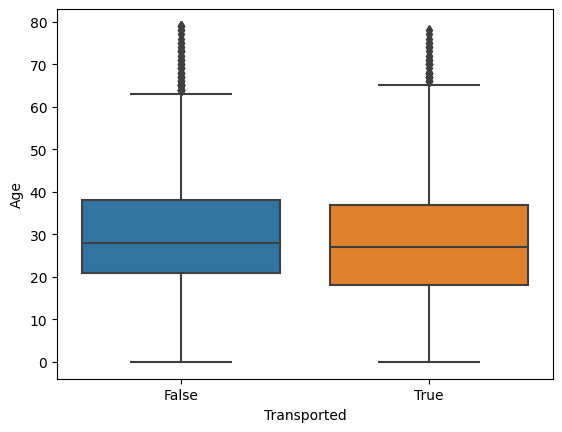

In [37]:
sns.boxplot(x='Transported', y='Age', data=train_data)

---
The Ages will be group into two groups ie young and old

---

In [39]:
bins = np.linspace(train_data['Age'].min(), train_data['Age'].max(), 3)
bins

array([ 0. , 39.5, 79. ])

In [40]:
labels = ['young', 'old']
train_data['Age'] = pd.cut(train_data['Age'], bins=bins, labels=labels, include_lowest=True)

In [41]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,young,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,young,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,old,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,young,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,young,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [42]:
test_data['Age'] = pd.cut(test_data['Age'], bins=bins, labels=labels, include_lowest=True)

In [43]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,young,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,young,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,young,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,young,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,young,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Step 5: Exploratory Data Analysis and Feature Engineering
---

This will be done in 2 steps

1. Feature Engineering

2. Exploratory Data Analysis

### 5.1 Feature Engineering
---